In [1]:
import pandas as pd
data=pd.read_table('agaricus-lepiota.data',delimiter=',')

In [2]:
data.describe()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
count,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,...,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3655,3244,2283,4748,3528,7913,6811,5612,1728,...,4935,4463,4383,8123,7923,7487,3967,2388,4040,3148


Definitely our data is of categorical type and we need to predict the first column as it indicates wheather the mushroom is edible(denoted by 'e') or it contains poison(denoted by 'p'). Moreover one should notice we need a prediction system with high precision even if at the cost of having low recall as false negative is okay but a false positive can take lives.

Now let us take a look at the NA or NULL values present in the system.

In [3]:
data.isna().sum()

p      0
x      0
s      0
n      0
t      0
p.1    0
f      0
c      0
n.1    0
k      0
e      0
e.1    0
s.1    0
s.2    0
w      0
w.1    0
p.2    0
w.2    0
o      0
p.3    0
k.1    0
s.3    0
u      0
dtype: int64

As no null values are present we shall directly delve into the correlation of various parameters with the first column.

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import dtale
dtale.show(data)

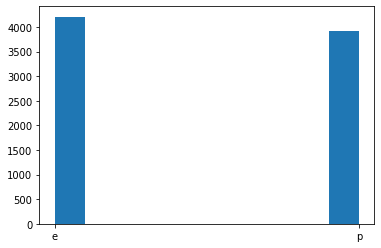

In [6]:
plt.hist(data['p'])
plt.show()

In [7]:
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
x=data.drop(['p'],axis=1)
y=data['p']

In [8]:

df=pd.get_dummies(data=x)

In [9]:
x.columns

Index(['x', 's', 'n', 't', 'p.1', 'f', 'c', 'n.1', 'k', 'e', 'e.1', 's.1',
       's.2', 'w', 'w.1', 'p.2', 'w.2', 'o', 'p.3', 'k.1', 's.3', 'u'],
      dtype='object')

In [10]:
df

,x_b,x_c,x_f,x_k,x_s,x_x,s_f,s_g,s_s,s_y,...,s.3_s,s.3_v,s.3_y,u_d,u_g,u_l,u_m,u_p,u_u,u_w
0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8119,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8120,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8121,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [11]:
y=[1 if (a=='p') else 0 for a in y]

In [12]:
y

[0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [13]:
import numpy as np

In [14]:

X_train,X_test,y_train,y_test=train_test_split(df,y,test_size=0.25)

In [15]:
X_train

,x_b,x_c,x_f,x_k,x_s,x_x,s_f,s_g,s_s,s_y,...,s.3_s,s.3_v,s.3_y,u_d,u_g,u_l,u_m,u_p,u_u,u_w
963,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
299,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5582,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
5847,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
745,1,0,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7748,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
940,0,0,0,0,0,1,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
5805,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2692,0,0,0,0,0,1,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [17]:
model_lr=RandomForestClassifier()
model_lr.fit(X_train,y_train)
model_lr.score(X_test,y_test)

1.0

This is clearly overfitting as 2^117>>the number of data instances, let us continue with principle component analysis

In [18]:
random_forest_pipeline=Pipeline([('Scalar',StandardScaler()),('PCA',PCA(n_components=4)),('Random_forest',RandomForestClassifier())])

In [19]:
random_forest_pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('Scalar',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('PCA',
                 PCA(copy=True, iterated_power='auto', n_components=4,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('Random_forest',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=1

In [20]:
random_forest_pipeline.score(X_test,y_test)

0.9945839487936977

In [21]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score((y_test),random_forest_pipeline.predict(X_test)))

print(confusion_matrix((y_test),random_forest_pipeline.predict(X_test)))

0.9945839487936977
[[1025    3]
 [   8  995]]


In [23]:
from sklearn.externals import joblib
joblib.dump(random_forest_pipeline,'RFP_Mushroom.pkl')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning:

sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.



['RFP_Mushroom.pkl']